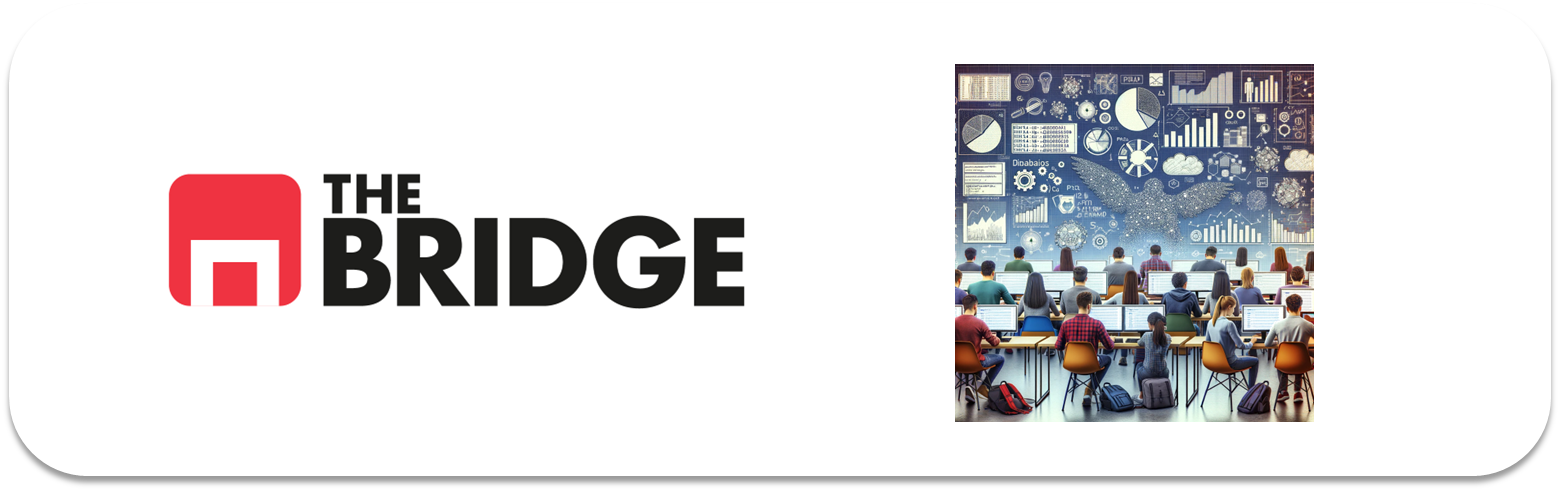

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt



### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [3]:
# 1: Cargar el dataset del Titanic
df_titanic = pd.read_csv("./data/titanic.csv")

In [4]:
# 2: Eliminar variables no necesarias
df_titanic.drop(['parch','deck', 'survived', 'embarked','pclass','sex','adult_male'], axis=1, inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          714 non-null    float64
 1   sibsp        891 non-null    int64  
 2   fare         891 non-null    float64
 3   class        891 non-null    object 
 4   who          891 non-null    object 
 5   embark_town  889 non-null    object 
 6   alive        891 non-null    object 
 7   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 49.7+ KB


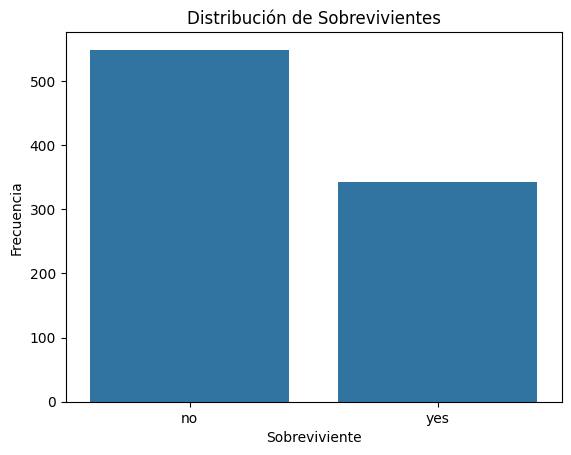

In [6]:
#3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

# Visualizar la distribución de la variable target 'Survived'
sns.countplot(x='alive', data=df_titanic)
plt.title('Distribución de Sobrevivientes')
plt.xlabel('Sobreviviente')
plt.ylabel('Frecuencia')
plt.show()

df_titanic.rename(columns = {'alive': 'target'}, inplace=True)


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          714 non-null    float64
 1   sibsp        891 non-null    int64  
 2   fare         891 non-null    float64
 3   class        891 non-null    object 
 4   who          891 non-null    object 
 5   embark_town  889 non-null    object 
 6   target       891 non-null    object 
 7   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 49.7+ KB


In [8]:
# Reemplazar filas con valores faltantes
df_titanic.loc[df_titanic["embark_town"].isna(),"embark_town"]= "Southampton"


In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          714 non-null    float64
 1   sibsp        891 non-null    int64  
 2   fare         891 non-null    float64
 3   class        891 non-null    object 
 4   who          891 non-null    object 
 5   embark_town  891 non-null    object 
 6   target       891 non-null    object 
 7   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 49.7+ KB


In [10]:
#4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
from sklearn.model_selection import train_test_split

# Dividir el dataset en train y test
train, test = train_test_split(df_titanic, test_size=0.2, random_state=42, stratify=df_titanic['embark_town'])

In [11]:
train["embark_town"].value_counts(normalize = True)

embark_town
Southampton    0.724719
Cherbourg      0.188202
Queenstown     0.087079
Name: proportion, dtype: float64

In [12]:
test["embark_town"].value_counts(normalize = True)


embark_town
Southampton    0.726257
Cherbourg      0.189944
Queenstown     0.083799
Name: proportion, dtype: float64

In [13]:
train.describe()

,age,sibsp,fare
count,561.000000,712.000000,712.000000
mean,30.184777,0.523876,32.292771
std,14.732071,1.099542,51.721504
min,0.750000,0.000000,0.000000
25%,21.000000,0.000000,7.895800
50%,29.000000,0.000000,14.454200
75%,39.000000,1.000000,30.548950
max,80.000000,8.000000,512.329200


In [14]:
#5. Construye las parejas X,y de train y test.

X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test.drop('target', axis=1)
y_test = test['target']

In [15]:
# 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

# Calcular las medias para las columnas numéricas
medias_numericas = X_train.select_dtypes(include='number').mean()

# Imputar nulos en las columnas numéricas con las medias
for column in medias_numericas.index:
    X_train[column].fillna(medias_numericas[column], inplace=True)

# Calcular las modas para las columnas categóricas
modas_categoricas = X_train.select_dtypes(include='object').mode().iloc[0]

# Imputar nulos en las columnas categóricas con las modas
for column in modas_categoricas.index:
    X_train[column].fillna(modas_categoricas[column], inplace=True)

# Mostrar las medias y modas calculadas
print("Medias para columnas numéricas:")
print(medias_numericas)
print("\nModas para columnas categóricas:")
print(modas_categoricas)

Medias para columnas numéricas:
age      30.184777
sibsp     0.523876
fare     32.292771
dtype: float64

Modas para columnas categóricas:
class                Third
who                    man
embark_town    Southampton
Name: 0, dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_113000\569499503.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(medias_numericas[column], inplace=True)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_113000\569499503.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [17]:
# 6. TEST. imputa los nulos con medias y modas en la X de test. Guarda esas medias que necesitarás en la parte de test.

# Imputar nulos en las columnas numéricas con las medias
for column in medias_numericas.index:
    X_test[column].fillna(medias_numericas[column], inplace=True)

# Imputar nulos en las columnas categóricas con las modas
for column in modas_categoricas.index:
    X_test[column].fillna(modas_categoricas[column], inplace=True)

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_113000\2235218839.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test[column].fillna(medias_numericas[column], inplace=True)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_113000\2235218839.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

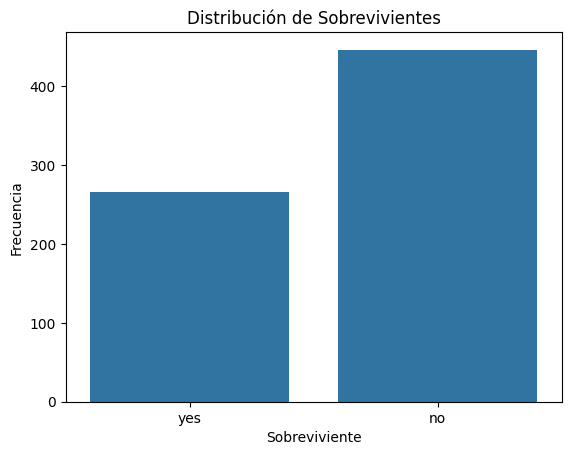

KeyError: 'target'

In [18]:
# 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

# Visualizar la distribución de la variable objetivo 'Survived'
sns.countplot(x='target', data=train)
plt.title('Distribución de Sobrevivientes')
plt.xlabel('Sobreviviente')
plt.ylabel('Frecuencia')
plt.show()

X_train['target'].value_counts(normalize=True)

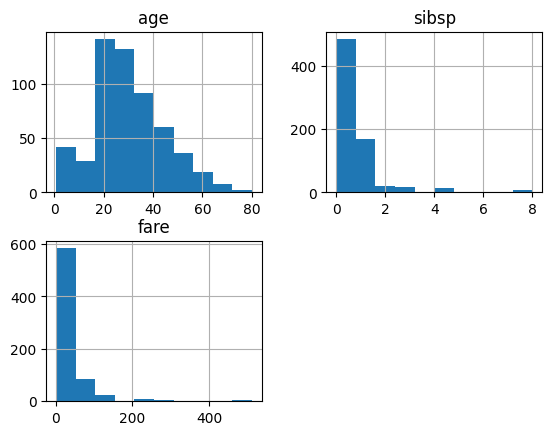

In [ ]:
train.drop("target", axis = 1).hist()
plt.show()

In [287]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          712 non-null    float64
 1   sibsp        712 non-null    int64  
 2   fare         712 non-null    float64
 3   class        712 non-null    object 
 4   who          712 non-null    object 
 5   embark_town  712 non-null    object 
 6   alone        712 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 39.6+ KB


In [20]:
features_cat = ["class","who","embark_town"]
features_num = ["age", "sibsp","fare"]

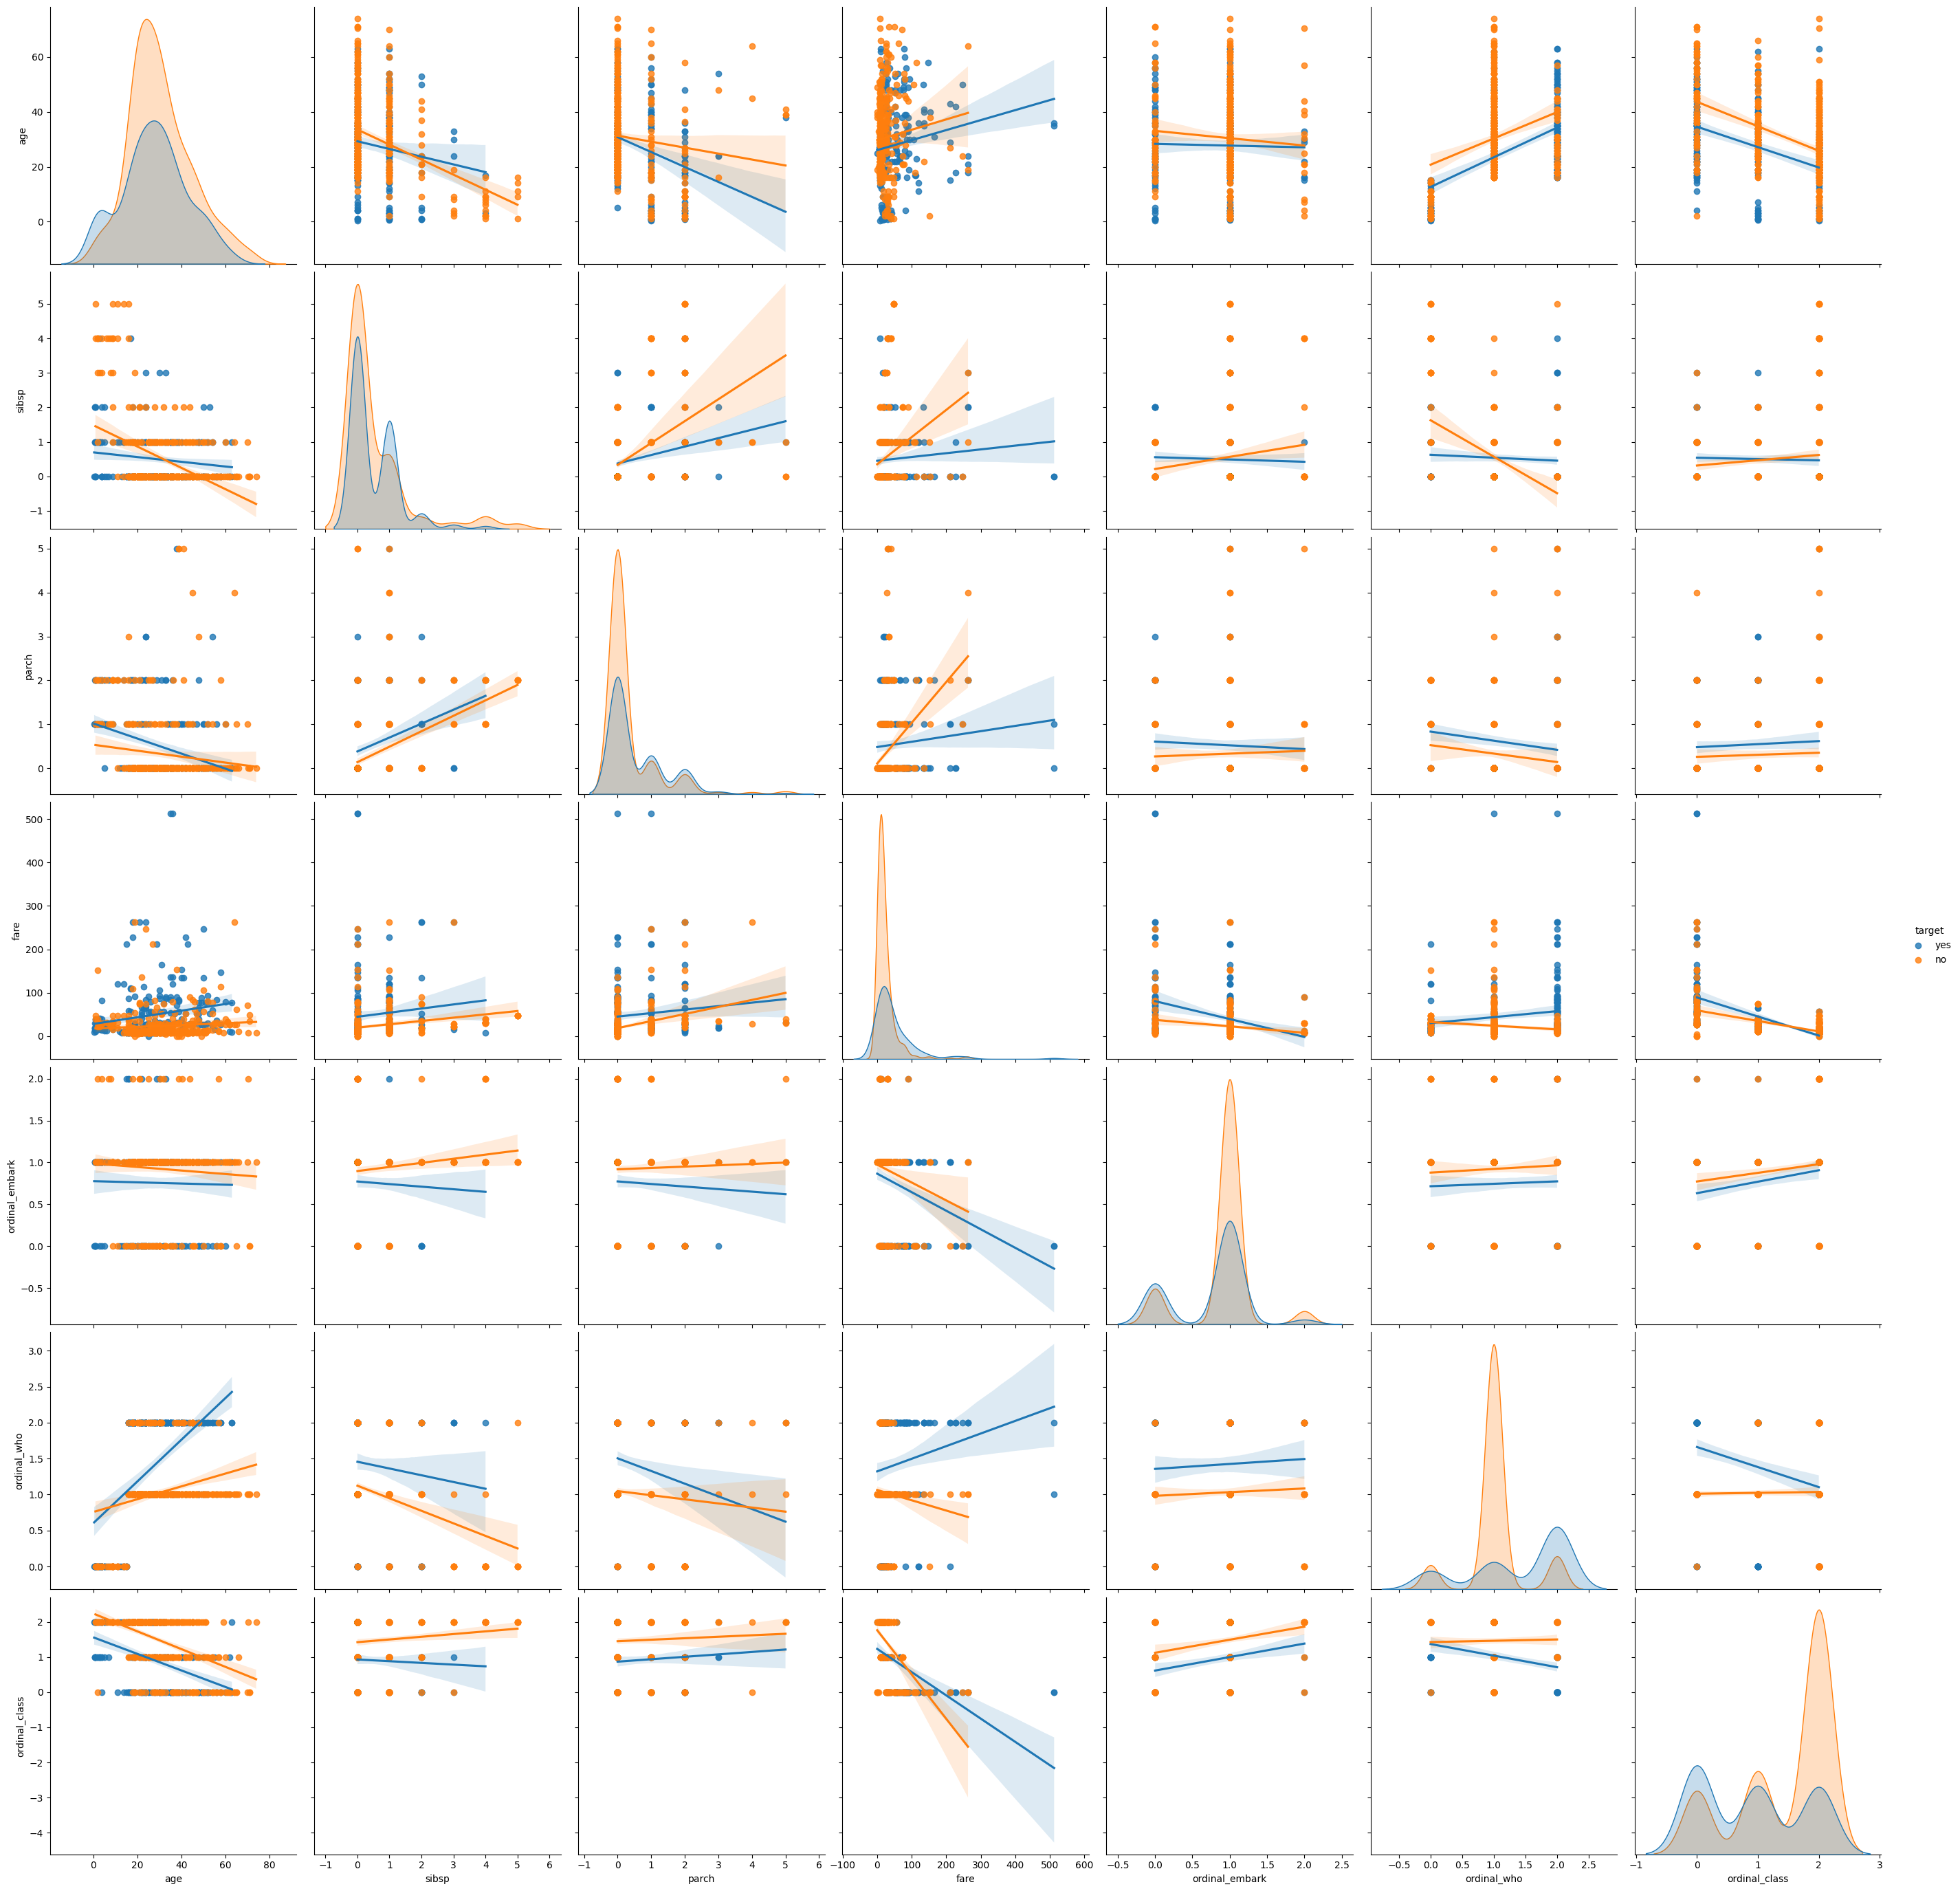

In [191]:
sns.pairplot(train,
            hue='target',
            height=4,
            vars=["age", "sibsp","parch","fare","ordinal_embark","ordinal_who","ordinal_class"],
            kind='reg'); # "reg" de regresión lineal

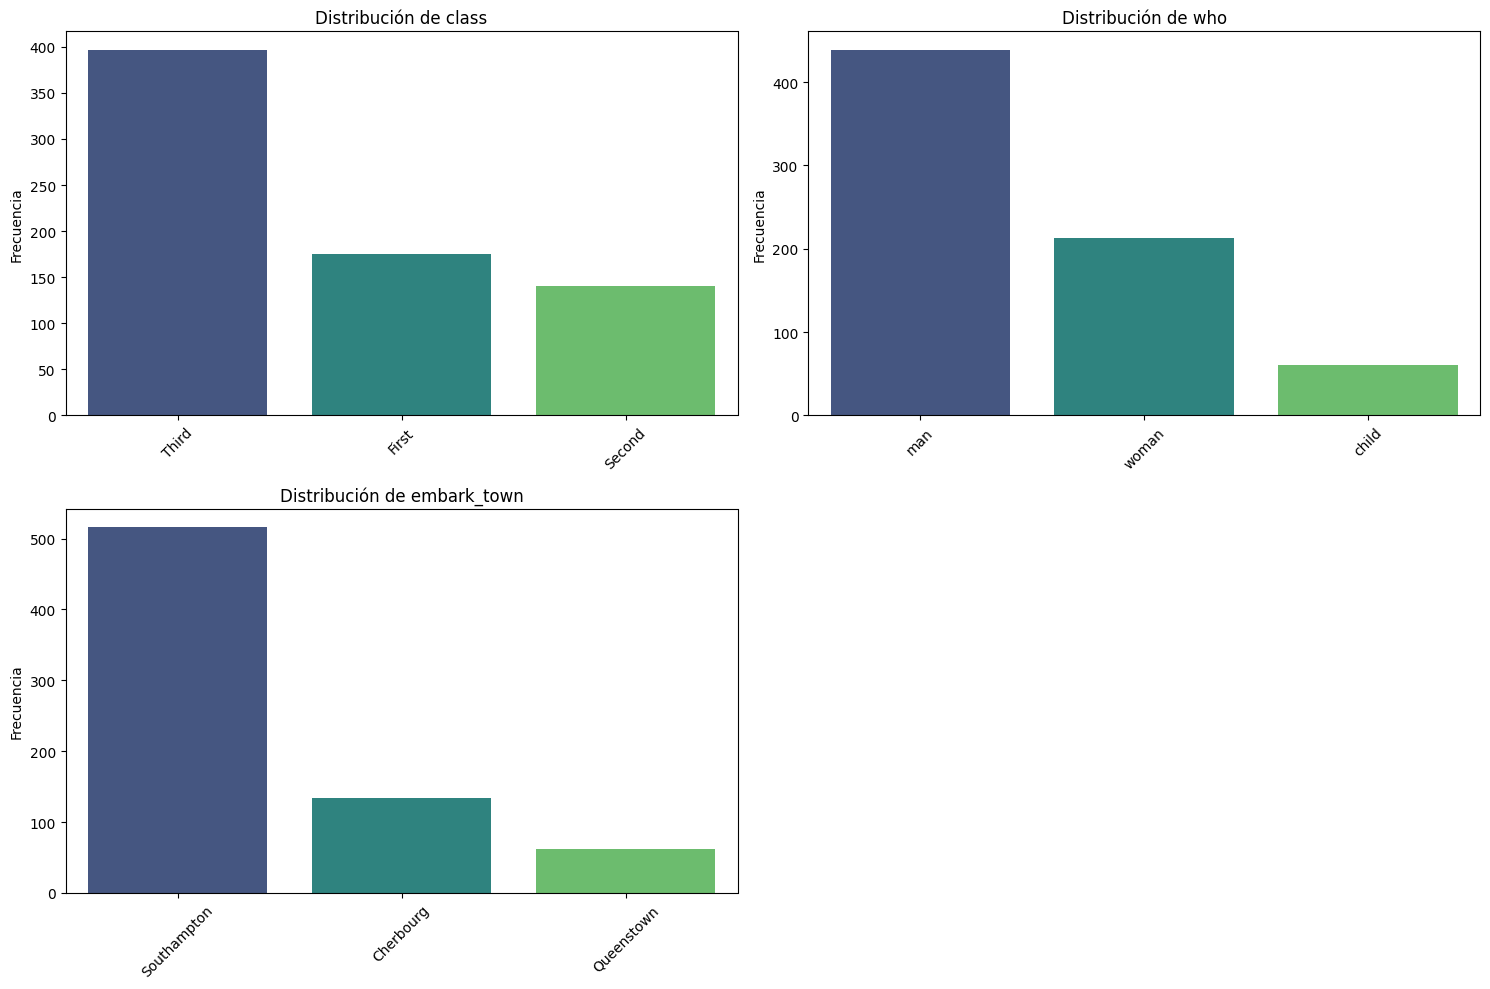

In [289]:
from bootcampviztools import pinta_distribucion_categoricas
pinta_distribucion_categoricas(X_train, features_cat, relativa=False, mostrar_valores=False)

In [21]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(X_train, target, feat, show_values= True, relative_freq= True)

NameError: name 'bt' is not defined

In [22]:
# 8. Tratamiento de variables
'''Código más limpio: 

categories = [["male","female"],["S","C","Q"], ["child","woman","man"]]
encoder = OrdinalEncoder(categories= categories)
train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])'''

# Pasar a encoder Embark town
from sklearn.preprocessing import OrdinalEncoder
categories = [["Cherbourg","Southampton","Queenstown"]]
ordinal_encoder = OrdinalEncoder(categories= categories)
X_train["ordinal_embark"] = ordinal_encoder.fit_transform(X_train[["embark_town"]])

X_train.ordinal_embark.value_counts()

X_test["ordinal_embark"] = ordinal_encoder.fit_transform(X_test[["embark_town"]])


# Pasar a encoder Who
categories = [["child","man","woman"]]
ordinal_encoder = OrdinalEncoder(categories= categories)
X_train["ordinal_who"] = ordinal_encoder.fit_transform(X_train[["who"]])

X_train.ordinal_who.value_counts()

X_test["ordinal_who"] = ordinal_encoder.fit_transform(X_test[["who"]])

# Pasar a encoder class
categories = [["First","Second","Third"]]
ordinal_encoder = OrdinalEncoder(categories= categories)
X_train["ordinal_class"] = ordinal_encoder.fit_transform(X_train[["class"]])

X_train.ordinal_class.value_counts()
X_test["ordinal_class"] = ordinal_encoder.fit_transform(X_test[["class"]])

# Columnas a eliminar
columns_to_drop = ['class', 'who', 'embark_town', 'alone']

# Eliminar las columnas del DataFrame X_train
X_train = X_train.drop(columns=columns_to_drop)


In [23]:
# Eliminar las columnas del DataFrame X_test
X_test= X_test.drop(columns=columns_to_drop)

In [292]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             712 non-null    float64
 1   sibsp           712 non-null    int64  
 2   fare            712 non-null    float64
 3   ordinal_embark  712 non-null    float64
 4   ordinal_who     712 non-null    float64
 5   ordinal_class   712 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 38.9 KB


In [24]:
X_train

,age,sibsp,fare,ordinal_embark,ordinal_who,ordinal_class
838,32.000000,0,56.4958,1.0,1.0,2.0
621,42.000000,1,52.5542,1.0,1.0,0.0
282,16.000000,0,9.5000,1.0,1.0,2.0
275,63.000000,1,77.9583,1.0,2.0,0.0
217,42.000000,1,27.0000,1.0,1.0,1.0
...,...,...,...,...,...,...
594,37.000000,1,26.0000,1.0,1.0,1.0
166,30.184777,0,55.0000,1.0,2.0,0.0
121,30.184777,0,8.0500,1.0,1.0,2.0
785,25.000000,0,7.2500,1.0,1.0,2.0


ValueError: supplied range of [-inf, 2.0794415416798357] is not finite

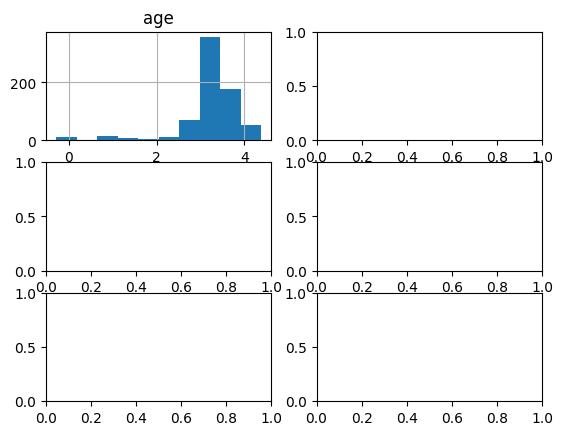

In [264]:
# VER CORRECCIÓN.
# Revisar corrección por categóricas y np

#8: Tratamiento de variables
features_num = X_train.columns.to_list()

for col in features_num:
    X_train[col] = X_train[col].apply(np.log)
X_train[features_num].hist()

In [25]:
#quita muchos datos. No utlizado
X_train["fare"] = np.sqrt(X_train["fare"])
X_train["fare"] = np.sqrt(X_test["fare"])
X_train["sibsp"] = np.sqrt(X_train["sibsp"])
X_test["sibsp"] = np.sqrt(X_test["sibsp"])

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[features_num]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train = pd.DataFrame(scaler.transform(X_train[features_num]), columns = features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)
X_train.describe()

c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,age,sibsp,fare
count,7.120000e+02,7.120000e+02,0.0
mean,1.621674e-17,4.989766e-18,NaN
std,1.000703e+00,1.000703e+00,NaN
min,-2.252905e+00,-6.337193e-01,NaN
25%,-5.690496e-01,-6.337193e-01,NaN
50%,-6.486696e-17,-6.337193e-01,NaN
75%,4.450907e-01,1.001958e+00,NaN
max,3.812802e+00,3.992675e+00,NaN


In [368]:
# 9. Construye un modelo de regresión logística.

from sklearn.linear_model import LogisticRegression

# Instanciar el modelo
clf = LogisticRegression(max_iter=10000)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Analizar los coeficientes del modelo
clf.coef_

array([[-0.27343867, -0.27199204,  0.97097286]])

In [369]:
# 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.



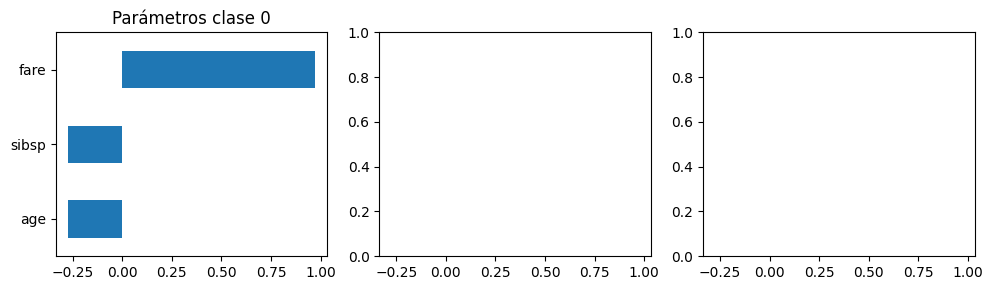

In [370]:
# 11: Procesamiento del conjunto de datos de prueba

df_coefs = pd.DataFrame(clf.coef_, columns=X_train.columns)

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
for i, subdf in df_coefs.iterrows():
    subdf.plot(kind="barh", ax=ax[i])
    ax[i].set_title(f"Parámetros clase {i}")

fig.tight_layout()

In [371]:
# 12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

# Ver predicciones
clf.predict(X_test)
clf.predict_proba(X_test)

array([[0.65506011, 0.34493989],
       [0.03505191, 0.96494809],
       [0.69165714, 0.30834286],
       [0.6888468 , 0.3111532 ],
       [0.69140668, 0.30859332],
       [0.64843318, 0.35156682],
       [0.56660594, 0.43339406],
       [0.54392959, 0.45607041],
       [0.69270785, 0.30729215],
       [0.69001888, 0.30998112],
       [0.77940817, 0.22059183],
       [0.61419556, 0.38580444],
       [0.62504302, 0.37495698],
       [0.3527466 , 0.6472534 ],
       [0.40532153, 0.59467847],
       [0.6552545 , 0.3447455 ],
       [0.71411665, 0.28588335],
       [0.53947912, 0.46052088],
       [0.69425993, 0.30574007],
       [0.72048678, 0.27951322],
       [0.64827916, 0.35172084],
       [0.63159793, 0.36840207],
       [0.72096594, 0.27903406],
       [0.74355878, 0.25644122],
       [0.62023618, 0.37976382],
       [0.72605315, 0.27394685],
       [0.68962833, 0.31037167],
       [0.71866068, 0.28133932],
       [0.69752971, 0.30247029],
       [0.31168958, 0.68831042],
       [0.

In [372]:
# Ver accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, clf.predict(X_train))
print(acc_train)


0.6910112359550562


In [373]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.65734266 0.6993007  0.66197183 0.71126761 0.66901408]
Logistic Regression: 0.679779 (0.021490)


In [374]:
# Evaluación Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm


,Predicho no,Predicho yes
Real no,97,6
Real yes,55,21


c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


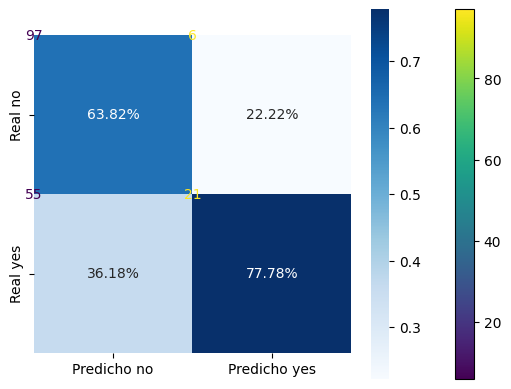

In [375]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [376]:
# Métricas MACRO y MICRO
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)


acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")


MICRO PRECISION: 0.659217877094972
MACRO PRECISION: 0.70796783625731
MICRO RECALL: 0.659217877094972
MACRO RECALL: 0.6090316811446091
MICRO ACCURACY: 0.659217877094972
Acierto: 65.92 %
Error: 34.08 %


In [377]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.64      0.94      0.76       103
         yes       0.78      0.28      0.41        76

    accuracy                           0.66       179
   macro avg       0.71      0.61      0.58       179
weighted avg       0.70      0.66      0.61       179



In [378]:
# Roc curve
from sklearn.metrics import roc_curve, auc
scores = clf(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

TypeError: 'LogisticRegression' object is not callable

In [ ]:
# 13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.



In [379]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     712 non-null    float64
 1   sibsp   712 non-null    float64
 2   fare    712 non-null    float64
dtypes: float64(3)
memory usage: 16.8 KB


In [385]:
# 14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  

target="alive"
new_features = ["age","sibsp","fare"] + [target]
new_target = "ordinal_class"


In [387]:
X_train = X_train[new_features]
y_train = X_train[new_target]
X_test = X_test[new_features]
y_test = X_test[new_target]

KeyError: "['alive'] not in index"

In [342]:
clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [344]:
# Ver predicciones
clf.predict(X_test)
clf.predict_proba(X_test)

array([[0.75607237, 0.24392763],
       [0.22520514, 0.77479486],
       [0.83767069, 0.16232931],
       [0.72464263, 0.27535737],
       [0.83763465, 0.16236535],
       [0.75485495, 0.24514505],
       [0.16063989, 0.83936011],
       [0.76781294, 0.23218706],
       [0.55663433, 0.44336567],
       [0.85866401, 0.14133599],
       [0.94999312, 0.05000688],
       [0.46377179, 0.53622821],
       [0.68042572, 0.31957428],
       [0.13278851, 0.86721149],
       [0.15641933, 0.84358067],
       [0.38981055, 0.61018945],
       [0.86480794, 0.13519206],
       [0.68052431, 0.31947569],
       [0.56152307, 0.43847693],
       [0.85847045, 0.14152955],
       [0.57241259, 0.42758741],
       [0.45903947, 0.54096053],
       [0.4550739 , 0.5449261 ],
       [0.91532848, 0.08467152],
       [0.20631411, 0.79368589],
       [0.84227362, 0.15772638],
       [0.56071701, 0.43928299],
       [0.90355405, 0.09644595],
       [0.30469119, 0.69530881],
       [0.05821536, 0.94178464],
       [0.

In [345]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

          no       0.64      0.94      0.76       103
         yes       0.78      0.28      0.41        76

    accuracy                           0.66       179
   macro avg       0.71      0.61      0.58       179
weighted avg       0.70      0.66      0.61       179



In [329]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- alone
- class
- embark_town
- who
